In [1]:
#mounting the GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import io
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import os
#from tqdm import tqdm_notebook
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [3]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'

In [4]:
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'

--2021-02-23 03:13:34--  https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv
Resolving stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)... 52.216.112.219
Connecting to stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)|52.216.112.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923682009 (1.8G) [text/csv]
Saving to: ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Questions.csv’

Questions.csv       100%[===================>]   1.79G  47.7MB/s    in 34s     

2021-02-23 03:14:09 (53.4 MB/s) - ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Questions.csv’ saved [1923682009/1923682009]



In [6]:
qdf = pd.read_csv(os.path.join(root_path, 'Questions.csv'),encoding='latin-1')

In [7]:
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'
!wget https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv -P '/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb'

--2021-02-23 03:15:30--  https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv
Resolving stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)... 52.216.146.123
Connecting to stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)|52.216.146.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1607914819 (1.5G) [text/csv]
Saving to: ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Answers.csv’

Answers.csv         100%[===================>]   1.50G  52.0MB/s    in 30s     

2021-02-23 03:16:00 (51.2 MB/s) - ‘/content/gdrive/MyDrive/Colab Notebooks/Copy of StackOverflowCS.ipynb/Answers.csv’ saved [1607914819/1607914819]

--2021-02-23 03:16:00--  https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv
Resolving stack-overflow-casestudy-datasets.s3.amazonaws.com (stack-overflow-casestudy-datasets.s3.amazonaws.com)... 

In [8]:
ansdf = pd.read_csv(os.path.join(root_path, 'Answers.csv'),encoding='latin-1')
tagsdf=pd.read_csv(os.path.join(root_path, 'Tags.csv'),encoding='latin-1')
usersdf=pd.read_csv(os.path.join(root_path, 'Users.csv'),encoding='latin-1')

In [2]:
#Loading the Datasets Directly from S3
question_file = 'https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv'        
qdf = pd.read_csv(question_file,encoding='latin-1')
answers_file='https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv'
ansdf=pd.read_csv(answers_file,encoding='latin-1')
tags_file="https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv"
tagsdf=pd.read_csv(tags_file,encoding='latin-1')
users_file="https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv"
usersdf=pd.read_csv(users_file,encoding='latin-1')

In [3]:
qdf.head(2)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


In [4]:
tagsdf.head(2)

,Id,Tag
0,80,flex
1,80,actionscript-3


In [5]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...


In [6]:
usersdf.head(2)

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


**Data Cleaning**
Removing Null Columns and Rows 
Removing unwanted Columns in the Dataset

In [7]:
qdf.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [8]:
#Calculating the missing value in Closed Date
100.0*(qdf.ClosedDate.isnull().sum())/len(qdf)

95.57362033070298

**95 % **of closed date is missing so we can drop Closed Date column

In [9]:
#Dropping Body column as it is not needed for the Analysis
qdf.drop(columns=["ClosedDate","Body"],axis=1,inplace=True)

In [10]:
qdf.head(2)

,Id,OwnerUserId,CreationDate,Score,Title
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...


In [11]:
ansdf.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [12]:
missing_ownerid_ansdf=100.0*(ansdf.OwnerUserId.isnull().sum())/len(ansdf)

In [13]:
print('Missing Percentage of OwnerUserID Column is : ', missing_ownerid_ansdf)

Missing Percentage of OwnerUserID Column is :  0.6552442373254915


In [14]:
#Dropping Rows in answer where owneruserid is null
ansdf=ansdf[~ansdf["OwnerUserId"].isnull()]

In [15]:
ansdf.OwnerUserId.isnull().sum()

0

In [16]:
#Dropping Body Column in the Answer Dataset
ansdf.drop(columns="Body",axis=1,inplace=True)


In [17]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01T14:45:37Z,90,13
1,124,26.0,2008-08-01T16:09:47Z,80,12


In [18]:
#Dropping the unnamed column in users dataset
usersdf.drop(columns="Unnamed: 0",axis=1,inplace=True)
usersdf.head(2)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [19]:
#dropping Creation Date as its not needed for the analysis
usersdf.drop(columns=["creation_date","display_name"],axis=1,inplace=True)
usersdf.head(2)

,id,last_access_date,reputation,up_votes,down_votes,views
0,26,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [20]:
#Duplicates in users Dataset
print("Duplicated id of 26 in users dataset ",len(usersdf[usersdf.id==26]))

Duplicated id of 26 in users dataset  27


In [21]:
#Dropping Duplicated Rows in ID 
usersdf.drop_duplicates(subset="id",inplace=True)

In [22]:
print("Duplicated id  users dataset ", usersdf.id.duplicated().any())

Duplicated id  users dataset  False


In [23]:
tagsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [24]:
tagsdf["Tag"]=tagsdf["Tag"].astype(str)

In [25]:
#Merging Tags into one column by splitting by space
tags_grouped=tagsdf.groupby('Id')['Tag'].apply(' '.join).reset_index()

In [26]:
tags_grouped.head(2)

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging


In [27]:
tags_grouped["Tag"].describe()

count     1264216
unique     685700
top       android
freq         9323
Name: Tag, dtype: object

In [28]:
#Datetime conversion for Date columns in all the Dataset
qdf["CreationDate"]=pd.to_datetime(qdf["CreationDate"])
ansdf["CreationDate"]=pd.to_datetime(ansdf["CreationDate"])
usersdf["last_access_date"]=pd.to_datetime(usersdf["last_access_date"])

Merging the Datasets

In [29]:
merged_table=pd.merge(qdf,tags_grouped,on=["Id","Id"],how="outer")

In [30]:
merged_table.head(2)

,Id,OwnerUserId,CreationDate,Score,Title,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air
1,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,svn tortoisesvn branch branching-and-merging


In [31]:
len(merged_table[merged_table.Tag == None])

0

In [32]:
merged_table.shape

(1264216, 6)

In [33]:
merged_table.describe()

,Id,OwnerUserId,Score
count,1.264216e+06,1.249762e+06,1.264216e+06
mean,2.132745e+07,2.155177e+06,1.781537e+00
std,1.151445e+07,1.801265e+06,1.366389e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.142598e+07,6.589110e+05,0.000000e+00
50%,2.172542e+07,1.611830e+06,0.000000e+00
75%,3.154542e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


In [34]:
#Changing the Column name OwnerUserid to q_uesrid and Score to q_score and id to q_id
merged_table.rename(columns={"OwnerUserId": "q_userid","Score":"q_score","Id":"q_Id","Title":"q_Title","CreationDate":"q_CreationDate"},inplace=True)

In [35]:
merged_table.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air
1,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,svn tortoisesvn branch branching-and-merging


In [36]:
ansdf.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01 14:45:37+00:00,90,13
1,124,26.0,2008-08-01 16:09:47+00:00,80,12


In [37]:
#Renaming Columns Id to a_id and OwnerUserid to a_userid ,CreationDate to a_CreationDate,Score to a_Score
ansdf.rename(columns={"Id":"a_Id","OwnerUserId":"a_userid","CreationDate":"a_CreationDate","Score":"a_Score","ParentId":"q_Id"},inplace=True)

In [38]:
ansdf.head(2)

,a_Id,a_userid,a_CreationDate,q_Id,a_Score
0,92,61.0,2008-08-01 14:45:37+00:00,90,13
1,124,26.0,2008-08-01 16:09:47+00:00,80,12


In [39]:
merged_table["q_Id"].duplicated().any()


False

In [40]:
merged_table.shape

(1264216, 6)

In [41]:
#Merging answer and Question
merged_q_a=pd.merge(merged_table,ansdf,on=["q_Id","q_Id"],how="inner")

In [42]:
merged_q_a.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,124,26.0,2008-08-01 16:09:47+00:00,12
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,10008,1109.0,2008-08-13 16:09:09+00:00,6


In [43]:
merged_q_a["q_Id"].duplicated().any()

True

In [44]:
merged_q_a.shape


(2001316, 10)

In [45]:
usersdf.head(2)

,id,last_access_date,reputation,up_votes,down_votes,views
0,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
27,1109,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905


In [46]:
usersdf.rename(columns={"id":"userid"},inplace=True)

In [47]:
usersdf.head(2)

,userid,last_access_date,reputation,up_votes,down_votes,views
0,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
27,1109,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905


In [48]:
usersdf.userid.duplicated().any()

False

In [49]:
#Merging User table as well
merged_whole=pd.merge(merged_q_a,usersdf,left_on="a_userid",right_on="userid",how="inner")

In [50]:
merged_whole.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score,userid,last_access_date,reputation,up_votes,down_votes,views
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,124,26.0,2008-08-01 16:09:47+00:00,12,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,580,91.0,2008-08-02 23:30:59+00:00,21,Deploying SQL Server Databases from Test to Live,sql-server sql-server-2005 deployment release-...,1464,26.0,2008-08-04 18:00:50+00:00,5,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


In [51]:
merged_whole.shape

(1990480, 16)

In [52]:
merged_whole.describe()

,q_Id,q_userid,q_score,a_Id,a_userid,a_Score,userid,reputation,up_votes,down_votes,views
count,1.990480e+06,1.960156e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06,1.990480e+06
mean,1.809171e+07,1.813723e+06,5.654644e+00,1.916351e+07,1.480737e+06,2.485415e+00,1.480737e+06,4.545504e+04,1.539702e+03,8.212407e+02,9.450821e+03
std,1.167883e+07,1.698687e+06,4.671906e+01,1.167345e+07,1.543848e+06,1.596865e+01,1.543848e+06,1.226378e+05,3.494248e+03,4.199035e+03,7.877572e+04
min,8.000000e+01,1.000000e+00,-7.300000e+01,9.200000e+01,1.000000e+00,-4.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.715652e+06,4.408440e+05,0.000000e+00,8.876039e+06,2.797618e+05,0.000000e+00,2.797618e+05,9.310000e+02,5.800000e+01,2.000000e+00,1.090000e+02
50%,1.712833e+07,1.235303e+06,1.000000e+00,1.866768e+07,9.494760e+05,1.000000e+00,9.494760e+05,5.042000e+03,3.530000e+02,1.800000e+01,5.290000e+02
75%,2.804313e+07,2.784556e+06,3.000000e+00,2.929020e+07,2.183668e+06,2.000000e+00,2.183668e+06,2.806100e+04,1.470000e+03,1.490000e+02,2.675000e+03
max,4.014319e+07,7.046594e+06,5.190000e+03,4.014339e+07,7.045028e+06,5.718000e+03,7.045028e+06,1.128126e+06,1.005200e+05,7.495500e+04,1.835157e+06


**Data Analysis**

**3.While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.**



***Analysis of Top 25 Trending Tags this will help us to understand the active community of tags so that we can suggest the active community tags to the user depending upon the question ***

In [ ]:
from collections import Counter

In [ ]:
tags = list (merged_whole['Tag'].unique())
all_tags = []
for tag in tags:
    all_tags += tag.split(' ')

In [ ]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

In [ ]:
tags.dtypes

**Popular Tags in Datascience**

In [57]:
Datascience_list=['python', 'r', 'matlab', 'sas', 'excel', 'sql']
for i in Datascience_list :
  x = []
  y = []
  for tag in Datascience_list:
    index = list (tags['tag']).index(tag)
    x.append(tag)
    y.append(list (tags['count'])[index])

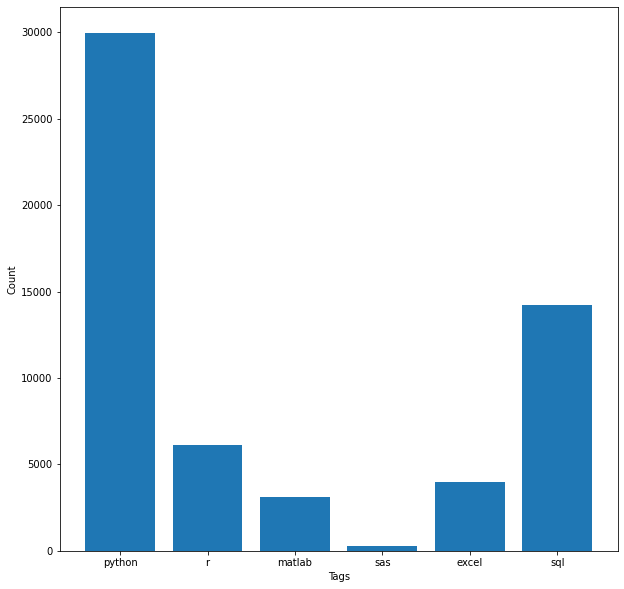

In [58]:
plt.bar(x, y)
plt.ylabel('Count')
plt.xlabel('Tags')
#plt.title('Popular Data Science Tags')
plt.show()

***Python is more popular in Datascience tags than sql as it is a general programming so once the user asks questions in python Stack overflow can suggest the user to tag the python tag using Auto tagging feature depending upon the question for getting the response quickly ***

**Filtering the Datset with respect to Datascience tags**

In [59]:
Datascience=['python','r' ,'matlab', 'sas', 'excel', 'sql']
def filter_datascience(tags):
    """Function to check if tag is in most common tag list"""
    tags_filtered = []  
    for i in range(0, len(tags)):
      for j in range(i,len(Datascience)):
        if tags[i] == Datascience[j]:
            tags_filtered.append(tags[i])
    return ' '.join([str(x) for x in tags_filtered])
     

In [60]:
len(tagsdf[tagsdf.Tag == 'r'])

15701

In [61]:
! pip3 install mysql-connector

Defaulting to user installation because normal site-packages is not writeable


In [62]:
import mysql.connector

In [63]:
merged_DS=merged_whole.copy()

In [64]:
len(merged_whole[merged_whole.Tag == 'r'])

4205

In [65]:
merged_DS.head(2)

,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score,userid,last_access_date,reputation,up_votes,down_votes,views
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,flex actionscript-3 air,124,26.0,2008-08-01 16:09:47+00:00,12,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,580,91.0,2008-08-02 23:30:59+00:00,21,Deploying SQL Server Databases from Test to Live,sql-server sql-server-2005 deployment release-...,1464,26.0,2008-08-04 18:00:50+00:00,5,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


In [66]:
merged_DS["Tags"]=merged_DS.Tag.apply(lambda x : x.split(" "))
#merged_DS.head(3)

merged_DS['Tags']=merged_DS.Tags.apply(lambda x: filter_datascience(x))
merged_DS['Tags'] = merged_DS['Tags'].apply(lambda x: x if len(x) >0 else None)

In [67]:
# Drop rows that contain None in Tags column
merged_DS.dropna(subset=['Tags'], inplace=True)
merged_DS.head(4)


,q_Id,q_userid,q_CreationDate,q_score,q_Title,Tag,a_Id,a_userid,a_CreationDate,a_Score,userid,last_access_date,reputation,up_votes,down_votes,views,Tags
6,252230,28004.0,2008-10-31 00:17:40+00:00,4,Stored procedures or inline queries?,sql stored-procedures subsonic,252595,26.0,2008-10-31 04:27:08+00:00,0,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,sql
21,1990020,242085.0,2010-01-01 23:29:24+00:00,2,SQL statement - update on two tables,sql sql-server,1990040,26.0,2010-01-01 23:36:57+00:00,1,26,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,sql
105,120,83.0,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,sql asp.net sitemap,124363,12734.0,2008-09-23 22:41:11+00:00,9,12734,2019-08-29 19:59:10.743000+00:00,695,35,0,105,sql
113,1068900,NaN,2009-07-01 12:29:25+00:00,2,Keep code in separate file,php sql mysql,1068927,50.0,2009-07-01 12:34:48+00:00,1,50,2019-08-26 23:37:44.843000+00:00,8525,814,50,1731,sql


In [68]:
merged_DS.shape

(210361, 17)

In [69]:
#Splitting only Tag and QID
tag_fg = merged_DS[["Tags","q_Id","Tag"]]


In [70]:
merged_DS.shape

(210361, 17)

In [71]:
tag_fg.shape

(210361, 3)

In [72]:
tag_fg.drop_duplicates(subset="q_Id",inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
tag_fg["q_Id"].duplicated().any()

False

In [74]:
tag_fg.shape

(115093, 3)

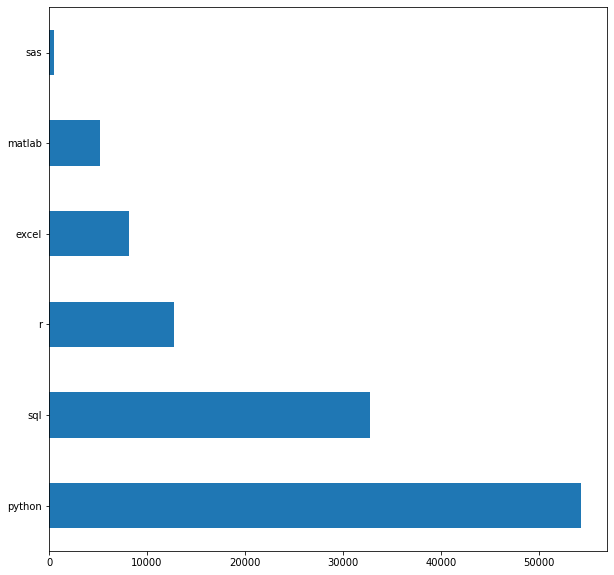

In [75]:
tag_fg.Tags.value_counts()[:6].plot.barh()
plt.title="Top Datascience Tagged Question"

In [76]:
tag_fg.groupby('Tags').size().sort_values(ascending=False)

Tags
python              54278
sql                 32810
r                   12775
excel                8161
matlab               5242
sas                   551
python sql            337
python excel          263
sql excel             161
python matlab         139
python r              118
r excel                56
sql sas                51
excel matlab           38
r matlab               37
sql r                  30
r sas                  17
excel sas               9
python sas              4
python r excel          4
sql matlab              3
python sql excel        2
python r matlab         2
excel r                 1
sql excel sas           1
sql r excel             1
sql r sas               1
r excel matlab          1
dtype: int64

**From the above graph we can infer that the most popular tag in the questions is the Datascience is Python and then sql**

In [81]:
# Connector object
dbc = mysql.connector.connect(
host = "test-instance.cw59yln8cdg6.us-east-1.rds.amazonaws.com",user = "admin",passwd = "admin123",port = 3306,database = "stackoverflow")
# Defining the cursor object
cur = dbc.cursor()
name="Divya"
image="demo"
# Inserting the values into columns
sql = "INSERT INTO demo(image, name) VALUES (%s, %s)"
val = (image,name)
cur.execute(sql, val)
dbc.commit()
# Read the stored values from RDS
cur.execute("SELECT image,name FROM demo")
result = cur.fetchall()
# Displaying the results
print(result)

[('demo', 'Divya'), ('demo', 'Divya'), ('demo', 'Divya')]


In [78]:
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [83]:
import sqlalchemy

### Inserting tag_fg EDA Data to RDS

In [84]:
host="test-instance.cw59yln8cdg6.us-east-1.rds.amazonaws.com"
port=3306
dbname="stackoverflow"
user="admin"
password="admin123" #now they make you add numbers...

In [85]:
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'
            .format(user, password,host, dbname)).connect()

In [86]:
tag_fg.to_sql(con=database_connection, name="tag_fg", if_exists='replace',chunksize=100, index=False)

In [87]:
# Creating SQL query to use together with database_connection in next line

sql_query='''
SELECT * FROM tag_fg limit 3
'''

In [88]:
tag_data=pd.read_sql(sql_query,con=database_connection)

In [89]:
tag_data.head(2)

,Tags,q_Id,Tag
0,sql,252230,sql stored-procedures subsonic
1,sql,1990020,sql sql-server


**What are the scoring of Data Science related tags in Questions?**
We can suggest these questions the top score question related to tags to the users depending on the ratings

In [90]:
tag_rate = merged_DS[['Tags', 'q_score']].drop_duplicates().reset_index(drop=True)
tag_rate.shape

(666, 2)

In [92]:
tagRate = {}
for i in range(len(tag_rate['Tags'])):
    for tag in tag_rate['Tags'][i].split(','):
        try:
            tagRate[tag].append(tag_rate['q_score'][i])
        except Exception:
            tagRate[tag] = [tag_rate['q_score'][i]]

In [93]:
tagRateAvg = {}
for key in list(tagRate.keys()):
    tagRateAvg[key] = np.average(tagRate[key])

In [94]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'q_score']
tagRateAvg = tagRateAvg.sort_values('q_score')

In [95]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['q_score'])[index])

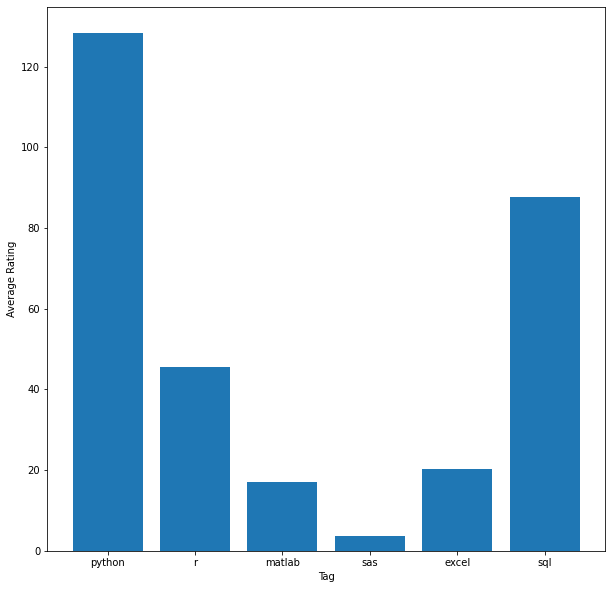

In [96]:
plt.bar(x, y)
plt.ylabel('Average Rating')
plt.xlabel('Tag')
plt.title='Scoring of Data Science Tags'
plt.show()

From the above graph we can see that **Python** and **R** got the high scores but when most popular tags Python and SQL were highest . **R** scored higher than **SQL**.

Text(0.5, 1.0, 'excel')

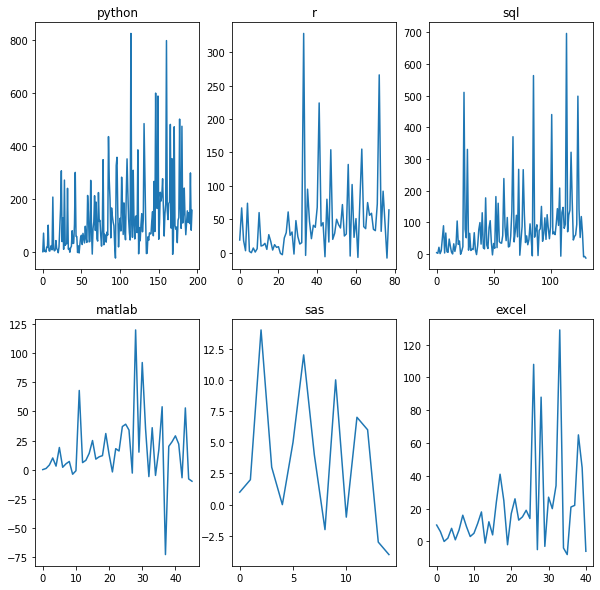

In [97]:
fig, ax = plt.subplots(2, 3)
ax[0][0].plot(tagRate['python'])
ax[0][0].set_title('python')

ax[0][1].plot(tagRate['r'])
ax[0][1].set_title('r')

ax[0][2].plot(tagRate['sql'])
ax[0][2].set_title('sql')

ax[1][0].plot(tagRate['matlab'])
ax[1][0].set_title('matlab')

ax[1][1].plot(tagRate['sas'])
ax[1][1].set_title('sas')

ax[1][2].plot(tagRate['excel'])
ax[1][2].set_title('excel')

From the above python has lot of questions we can see that python and SQl has most questions. SAS has the least questions but still R scored well than SQL.Stack overflow should focus more on Python,R and SQL SME . 
MatLab,SAS  has negative scoring as well .

**What are the scoring of Data Science related tags in Answers?**

In [108]:
tag_rateans = merged_DS[['Tags', 'a_Score']].drop_duplicates().reset_index(drop=True)
tag_rateans.shape

(793, 2)

In [109]:
tag_rateans.head(2)

,Tags,a_Score
0,sql,0
1,sql,1


In [110]:
tagRate = {}
for i in (range(len(tag_rateans['Tags']))):
    for tag in tag_rateans['Tags'][i].split(','):
        try:
            tagRate[tag].append(tag_rateans['a_Score'][i])
        except Exception:
            tagRate[tag] = [tag_rateans['a_Score'][i]]

In [111]:
tagRateAvg = {}
for key in list(tagRate.keys()):
    tagRateAvg[key] = np.average(tagRate[key])

In [112]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'a_Score']
tagRateAvg = tagRateAvg.sort_values('a_Score')

In [113]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['a_Score'])[index])

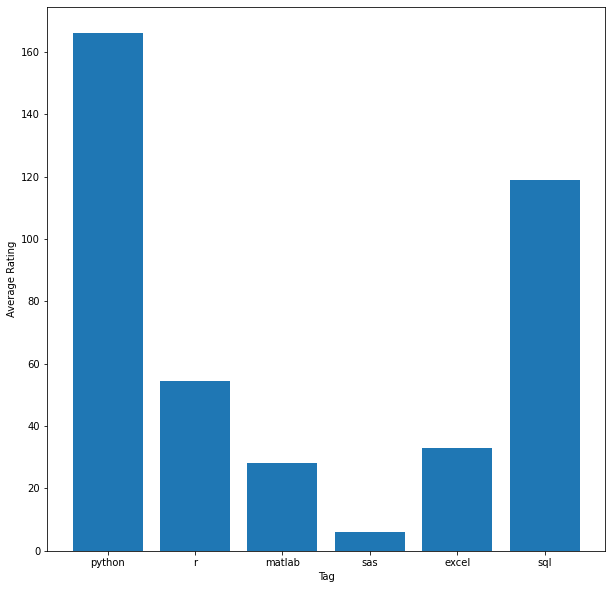

In [114]:
plt.bar(x, y)
plt.ylabel('Average Rating')
plt.xlabel('Tag')
#plt.title('Scoring of Data Science Tags')
plt.show()

**Python and SQL has highest score in answers**

Text(0.5, 1.0, 'excel')

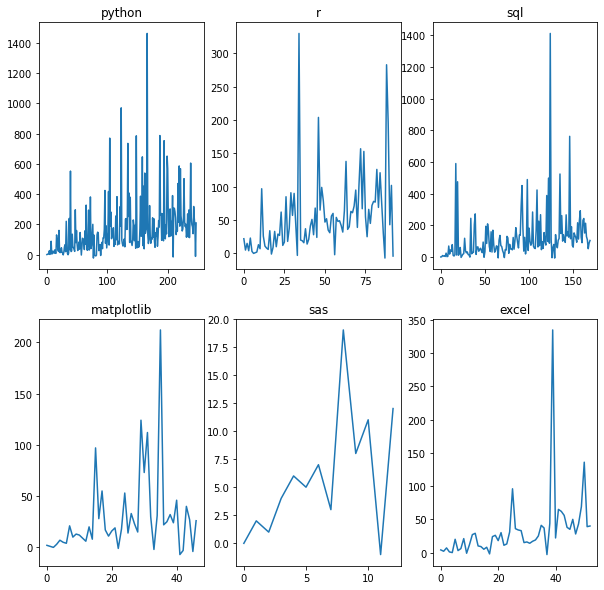

In [115]:
fig, ax = plt.subplots(2, 3)
ax[0][0].plot(tagRate['python'])
ax[0][0].set_title('python')

ax[0][1].plot(tagRate['r'])
ax[0][1].set_title('r')

ax[0][2].plot(tagRate['sql'])
ax[0][2].set_title('sql')

ax[1][0].plot(tagRate['matlab'])
ax[1][0].set_title('matplotlib')

ax[1][1].plot(tagRate['sas'])
ax[1][1].set_title('sas')

ax[1][2].plot(tagRate['excel'])
ax[1][2].set_title('excel')

**Python and SQL has more answers and sas has less answers **

**1.When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.**


**We need to find the top users answering the questions with Datascience with top reputation tags so that the notification is sent to the experts in the respected tags so that the questions are answered by the experts**

In [116]:
#Analysing the usersdf by reputation as we need to find the top users with high reputation for Datascience tags.
usersdf.reputation.describe()

count    4.654600e+05
mean     1.977049e+03
std      1.098895e+04
min      1.000000e+00
25%      6.600000e+01
50%      3.530000e+02
75%      1.165000e+03
max      1.128126e+06
Name: reputation, dtype: float64

In [117]:
usersdf.shape

(465460, 6)

In [118]:
usersdf.reputation.max()

1128126

In [119]:
usersdf.reputation.min()

1

In [120]:
usersdf.reputation.median()

353.0

<AxesSubplot:>

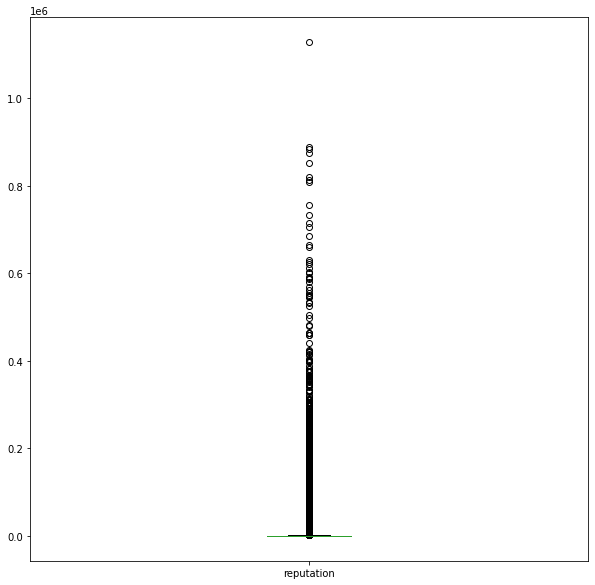

In [121]:
usersdf.reputation.plot.box()

**Reputation is highly Skewed and contains lot of outliers we can standardize the dataset by filtering based on Quartile**

**Univariate Analysis of Reputation in Usersdf**

In [122]:
Q1 = np.percentile(usersdf.reputation, 25, interpolation = 'midpoint') 

In [123]:
Q3 = np.percentile(usersdf.reputation, 75, interpolation = 'midpoint') 

In [124]:
IQR=Q3-Q1
print("Reputation Quartile in the users dataset IQR :",IQR)

Reputation Quartile in the users dataset IQR : 1099.0


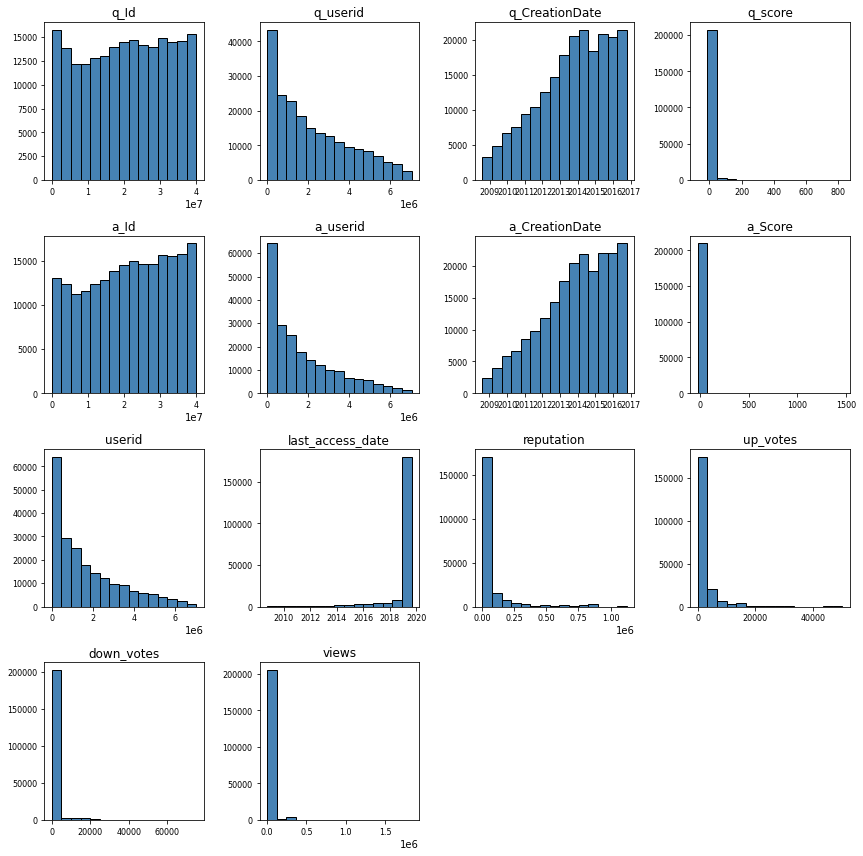

In [125]:
#Analysing the filtered dataset of only Datascience tags Merged_DS is the filtered DS related to Datascience
merged_DS.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [126]:
merged_DS.reputation.describe()

count    2.103610e+05
mean     6.443569e+04
std      1.474824e+05
min      1.000000e+00
25%      1.361000e+03
50%      8.450000e+03
75%      4.869800e+04
max      1.128126e+06
Name: reputation, dtype: float64

<AxesSubplot:ylabel='Frequency'>

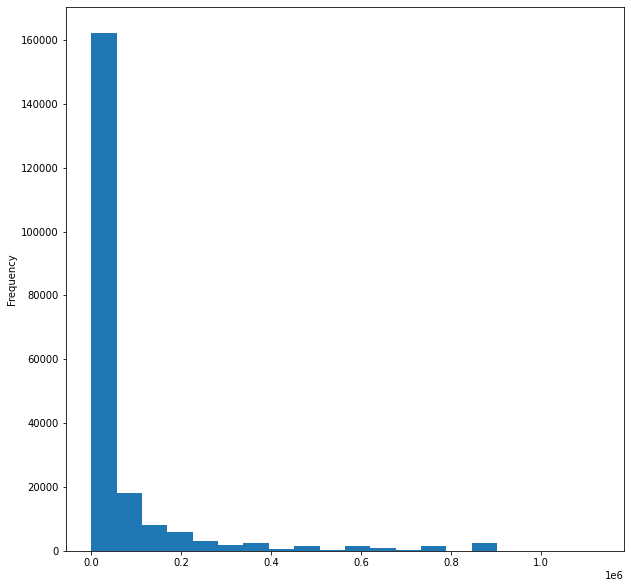

In [127]:
merged_DS["reputation"].plot.hist(bins=20)

**Reputation is skewed which we can standardize using the IQR filtering**

<AxesSubplot:>

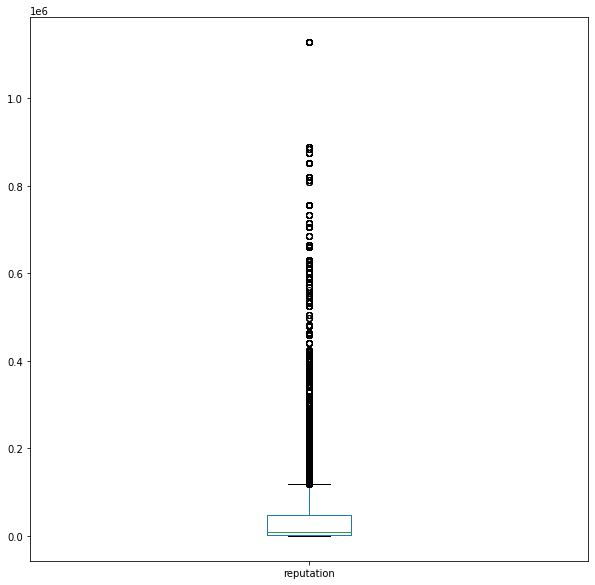

In [128]:
merged_DS["reputation"].plot.box()

**The reputation is totally Skewed in the Datascience Filtered Set so we need to Standardize and will be filtering only the users with reputation in the Quartlie to get maximum reach of the question when it is posted to float it to the respected SME in the tags**

In [129]:
# Computing IQR in Datascience Filetered Set
Q1 = merged_DS['reputation'].quantile(0.25)
Q3 = merged_DS['reputation'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = merged_DS.query('(@Q1 - 1.5 * @IQR) <= reputation <= (@Q3 + 1.5 * @IQR)')

<AxesSubplot:>

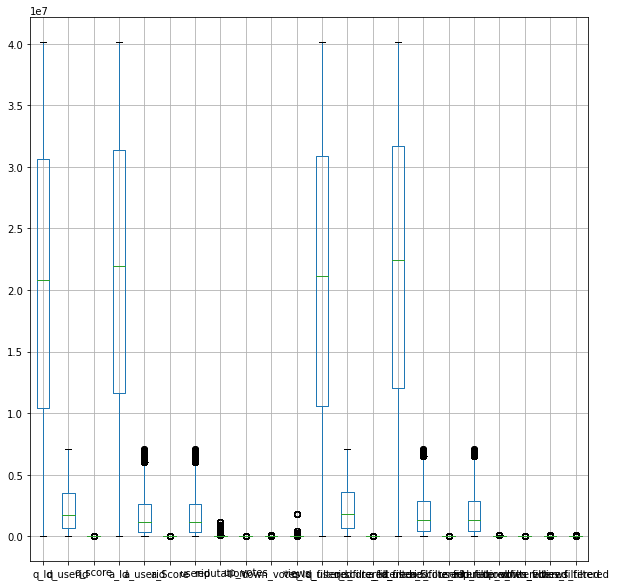

In [130]:
# Ploting the result to check the difference
merged_DS.join(filtered, rsuffix='_filtered').boxplot()

<AxesSubplot:>

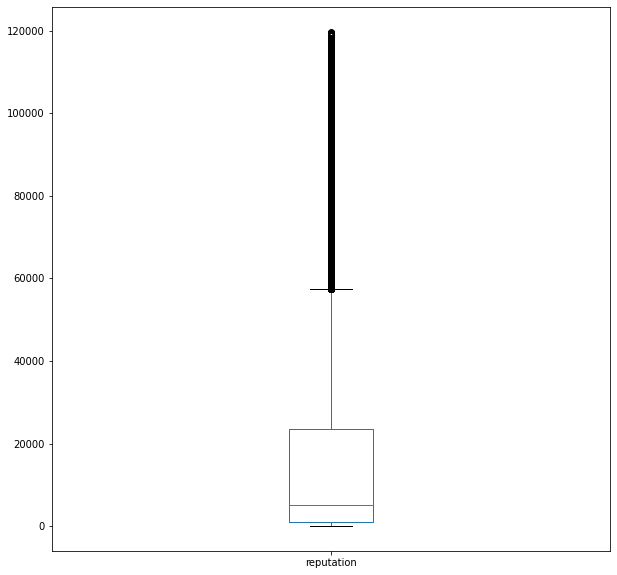

In [131]:
filtered.reputation.plot.box()

<AxesSubplot:ylabel='Frequency'>

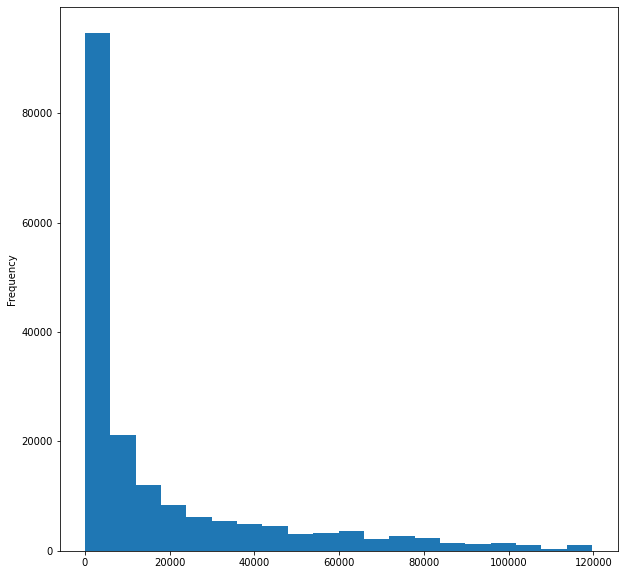

In [133]:
filtered.reputation.plot.hist(bins=20)
#plt.title("Distribution of Reputation after Standardization")

In [134]:
filtered.shape

(181204, 17)

**Grouping the Users with respect to tags for filtering for the notification when a question is posted with Datascience tags**

In [135]:
q_expert = filtered[["a_userid","reputation","Tags"]]

**we will use q_expert dataset as DB for sending the notification to relevant users who answer the relevant tags when a question is posted with the tags**

In [136]:
q_expert.sort_values(by="reputation",ascending=False,inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
q_expert.head(5)

,a_userid,reputation,Tags
27190,2688.0,119702,sql
81169,14637.0,119365,python
81088,14637.0,119365,r
81158,14637.0,119365,python
81159,14637.0,119365,python


In [138]:
q_expert.shape

(181204, 3)

In [139]:
q_expert.drop_duplicates(subset=["a_userid","Tags"],inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
q_expert.head(5)

,a_userid,reputation,Tags
27190,2688.0,119702,sql
81169,14637.0,119365,python
81088,14637.0,119365,r
81063,14637.0,119365,sql
788958,569436.0,119301,sql


In [141]:
df1=q_expert.groupby("Tags")["a_userid"].count()

<AxesSubplot:xlabel='Tags'>

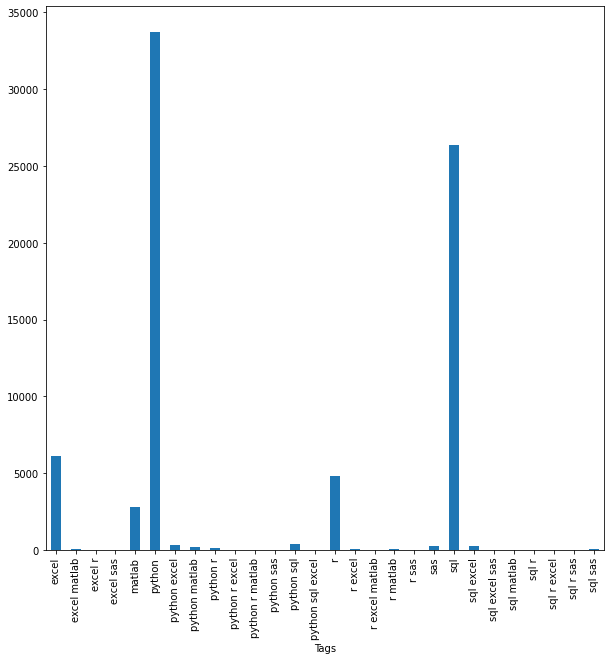

In [142]:
df1.plot.bar()

In [143]:
expert_users=q_expert.groupby("Tags")["a_userid"]

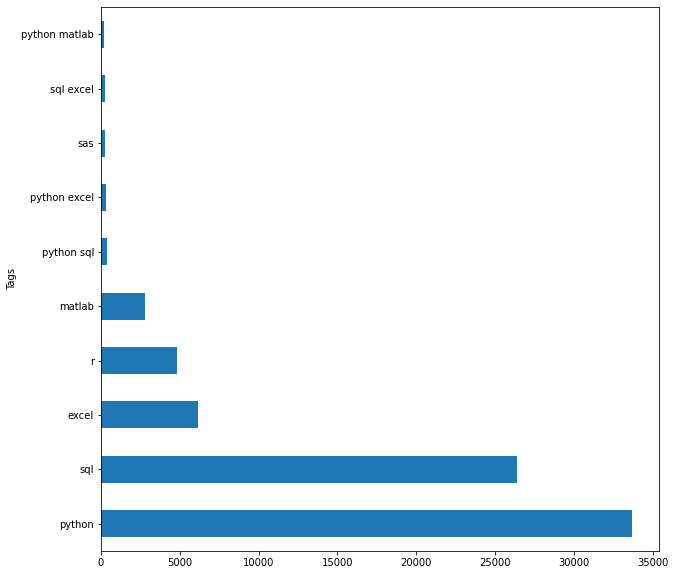

In [145]:
#Filtering the Top 10 Tags with the count of experts
expert_users.count().sort_values(ascending=False)[:10].plot.barh()
#plt.title("Expert Users for top 10 Tags")
plt.xlabel="User"
plt.show()

In [146]:
expert_users=pd.DataFrame(q_expert.groupby("Tags")["a_userid"])

In [147]:
expert_users.shape

(28, 2)

In [148]:
expert_users.head()

,0,1
0,excel,236222 59303.0 58603 6819.0 8274...
1,excel matlab,425954 97160.0 1474645 2586922.0 1632...
2,excel r,371464 134830.0 277959 37751.0 713092 ...
3,excel sas,1275340 1623007.0 1504733 2734437.0 3927...
4,matlab,425956 97160.0 117631 44330.0 7865...


**Python and SQL tags has lot of SME and experts in Datascience world so when a question is raised with these tags the notifications can be sent to these users**

### Inserting q_expert data to RDS

In [149]:
q_expert.to_sql(con=database_connection, name="expert_users", if_exists='replace',chunksize=100, index=False)

In [151]:
# Creating SQL query to use together with database_connection in next line

sql_query2='''
SELECT * FROM expert_users limit 3
'''

In [152]:
expertuser_data=pd.read_sql(sql_query2,con=database_connection)

In [154]:
expertuser_data.head(2)

,a_userid,reputation,Tags
0,2688.0,119702,sql
1,14637.0,119365,python


**Multivariate Analysis of each feature**

In [155]:
import seaborn as sns

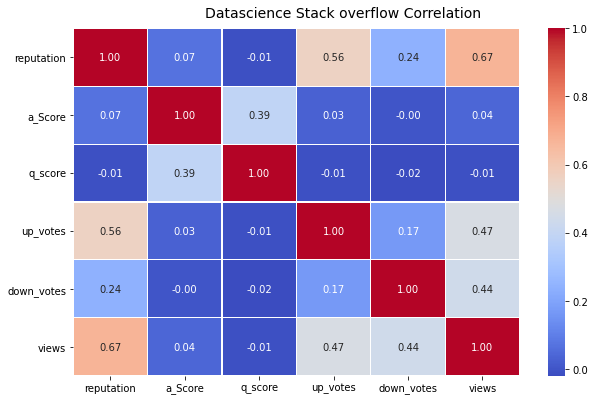

In [156]:
# Correlation Matrix Heatmap
ff=filtered[["reputation","a_Score","q_score","up_votes","down_votes","views"]]
f, ax = plt.subplots(figsize=(10, 6))
corr = ff.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Datascience Stack overflow Correlation', fontsize=14)

1.It seems like Up_votes and reputation has positive correlation of 0.56. 
2.Down_votes vs reputation has 0.24 positive correlation.
3.Views vs reputation has 0.67 positive correlation. 

**2.When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.**

In [157]:
#Analysing Datetime stamps of Questions Created time and answer created time.
time_qa = merged_DS[['q_CreationDate', 'a_CreationDate',"Tag"]]
time_qa.head(2)

,q_CreationDate,a_CreationDate,Tag
6,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,sql stored-procedures subsonic
21,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,sql sql-server


In [158]:
#Diffrence between First answer time and Question Created Date
import datetime
time_qa['diff'] = abs(time_qa['a_CreationDate'] - time_qa['q_CreationDate'])
time_qa.head(2)

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,q_CreationDate,a_CreationDate,Tag,diff
6,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,sql stored-procedures subsonic,0 days 04:09:28
21,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,sql sql-server,0 days 00:07:33


In [159]:
time_qa.sort_values("diff",ascending=True,inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
#Changing the datatype of diff to epoch time in seconds
time_qa["diff_epoch"]=time_qa["diff"].astype('int64')//1e9

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
# Computing IQR for filtering the response time
Q1 = time_qa['diff_epoch'].quantile(0.25)
Q3 = time_qa['diff_epoch'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered_timeqa = time_qa.query('(@Q1 - 1.5 * @IQR) <= diff_epoch <= (@Q3 + 1.5 * @IQR)')

In [162]:
filtered_timeqa.head(2)

,q_CreationDate,a_CreationDate,Tag,diff,diff_epoch
694421,2013-11-12 18:34:55+00:00,2013-11-12 18:34:55+00:00,python dictionary,0 days,0.0
1307699,2015-08-17 19:21:34+00:00,2015-08-17 19:21:34+00:00,python decorator introspection python-decorators,0 days,0.0


In [163]:
print("The mean time for the question to be answered in hrs ",(filtered_timeqa["diff_epoch"].median())/3600.0)

The mean time for the question to be answered in hrs  0.26305555555555554


In [164]:
print("The max time that takes for a question to be answered in Hrs",(filtered_timeqa["diff_epoch"].max())/3600.0)

The max time that takes for a question to be answered in Hrs 7.600833333333333


In [165]:
print("The average time response between the question and answer time in Hrs ",np.average(filtered_timeqa["diff_epoch"])/3600.0)

The average time response between the question and answer time in Hrs  0.7839478963749795


In [166]:
filtered_timeqa["diff_epoch"].describe()

count    168891.000000
mean       2822.212427
std        4622.171777
min           0.000000
25%         389.000000
50%         947.000000
75%        2817.000000
max       27363.000000
Name: diff_epoch, dtype: float64

**No of tags tagged in questions and its impact in response time ?**

In [167]:
tag_rate = merged_DS[['Tag', 'q_CreationDate', 'a_CreationDate']].drop_duplicates().reset_index(drop=True)
tag_rate['diff'] = abs(tag_rate['q_CreationDate'] - tag_rate['a_CreationDate'])
tag_rate.head()

,Tag,q_CreationDate,a_CreationDate,diff
0,sql stored-procedures subsonic,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,0 days 04:09:28
1,sql sql-server,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,0 days 00:07:33
2,sql asp.net sitemap,2008-08-01 15:50:08+00:00,2008-09-23 22:41:11+00:00,53 days 06:51:03
3,php sql mysql,2009-07-01 12:29:25+00:00,2009-07-01 12:34:48+00:00,0 days 00:05:23
4,php mysql html sql forms,2011-10-15 02:49:19+00:00,2011-10-15 02:57:29+00:00,0 days 00:08:10


In [168]:
tag_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210245 entries, 0 to 210244
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Tag             210245 non-null  object             
 1   q_CreationDate  210245 non-null  datetime64[ns, UTC]
 2   a_CreationDate  210245 non-null  datetime64[ns, UTC]
 3   diff            210245 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), object(1), timedelta64[ns](1)
memory usage: 6.4+ MB


In [169]:
tag_rate.head(2)

,Tag,q_CreationDate,a_CreationDate,diff
0,sql stored-procedures subsonic,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,0 days 04:09:28
1,sql sql-server,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,0 days 00:07:33


In [170]:
tag_rate["diffint"]=tag_rate["diff"].astype('timedelta64[s]').astype(int)

In [171]:
tag_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210245 entries, 0 to 210244
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Tag             210245 non-null  object             
 1   q_CreationDate  210245 non-null  datetime64[ns, UTC]
 2   a_CreationDate  210245 non-null  datetime64[ns, UTC]
 3   diff            210245 non-null  timedelta64[ns]    
 4   diffint         210245 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 8.0+ MB


In [172]:
tag_rate.head(2)

,Tag,q_CreationDate,a_CreationDate,diff,diffint
0,sql stored-procedures subsonic,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,0 days 04:09:28,14968
1,sql sql-server,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,0 days 00:07:33,453


In [175]:
AnsRate = {}
for i in (range(len(tag_rate['Tag']))):
    for tag in tag_rate['Tag'][i].split(','):
        try:
            AnsRate[tag].append(tag_rate['diffint'][i])
        except Exception:
            AnsRate[tag] = [tag_rate['diffint'][i]]

In [176]:
tagRateAvg = {}
for key in list(AnsRate.keys()):
    tagRateAvg[key] = np.average(AnsRate[key])

In [177]:
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tag', 'diffint']
tagRateAvg = tagRateAvg.sort_values('diffint')

In [178]:
data_science = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science:
    index = list(tagRateAvg['Tag']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['diffint'])[index])

TypeError: 'str' object is not callable

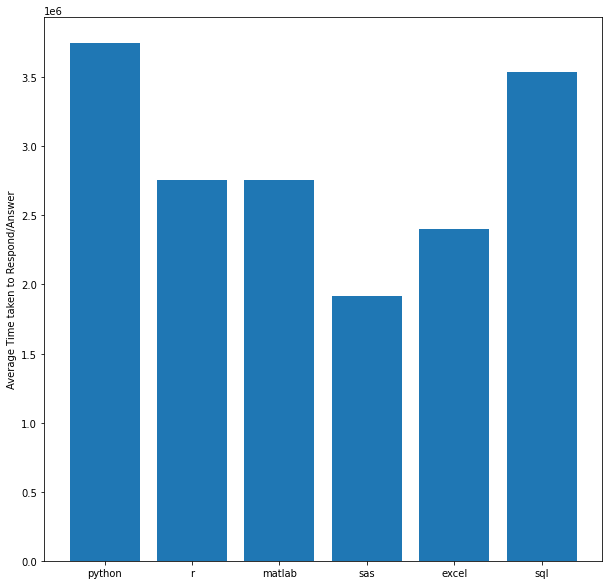

In [179]:
plt.bar(x, y)
plt.ylabel('Average Time taken to Respond/Answer')
plt.xlabel('Tag')
#plt.title('Active/Inactive Community in Data Science')
plt.show()

**by the above graph Python and SQL tags have good average response time for the questions**

In [181]:
tag_countdf=merged_DS[["q_Id","Tag","a_Id","q_CreationDate","a_CreationDate","Tags"]]

In [182]:
tag_countdf.shape

(210361, 6)

In [183]:
tag_countdf["tag_count"]=tag_countdf["Tag"].apply(lambda text: len(text.split(" ")))

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
tag_countdf.head()

,q_Id,Tag,a_Id,q_CreationDate,a_CreationDate,Tags,tag_count
6,252230,sql stored-procedures subsonic,252595,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,sql,3
21,1990020,sql sql-server,1990040,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,sql,2
105,120,sql asp.net sitemap,124363,2008-08-01 15:50:08+00:00,2008-09-23 22:41:11+00:00,sql,3
113,1068900,php sql mysql,1068927,2009-07-01 12:29:25+00:00,2009-07-01 12:34:48+00:00,sql,3
127,7775440,php mysql html sql forms,7775483,2011-10-15 02:49:19+00:00,2011-10-15 02:57:29+00:00,sql,5


In [185]:
#dropping duplicates Questions 
ff=tag_countdf.drop_duplicates(subset="q_Id")

TypeError: 'str' object is not callable

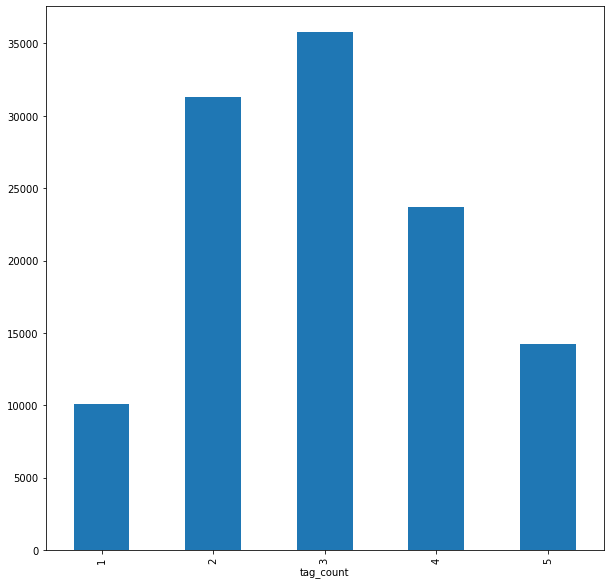

In [187]:
ff.groupby("tag_count")["q_Id"].count().plot.bar()
plt.xlabel("No of Tags")
plt.ylabel("No of Questions")
#plt.title="No of Tags vs No of Questions"
plt.show()

**The above graph shows that mostly the questions are tagged with 3 Tags**

**Is there any influence on no of Tag counts and response time?**

In [188]:
ff["diffint"]=(ff["a_CreationDate"] - ff["q_CreationDate"]).astype('timedelta64[s]').astype(int)

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
ff.head(2)

,q_Id,Tag,a_Id,q_CreationDate,a_CreationDate,Tags,tag_count,diffint
6,252230,sql stored-procedures subsonic,252595,2008-10-31 00:17:40+00:00,2008-10-31 04:27:08+00:00,sql,3,14968
21,1990020,sql sql-server,1990040,2010-01-01 23:29:24+00:00,2010-01-01 23:36:57+00:00,sql,2,453


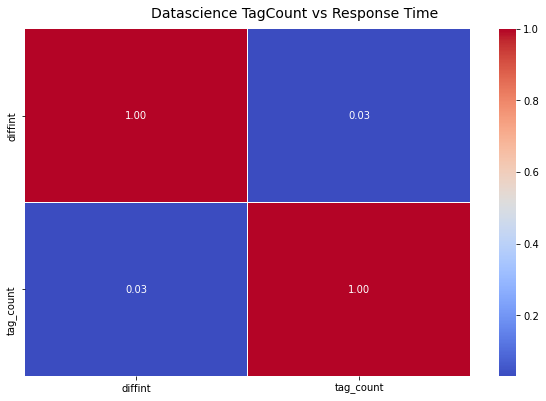

In [190]:
ff1=ff[["diffint","tag_count"]]
f, ax = plt.subplots(figsize=(10, 6))
corr = ff1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Datascience TagCount vs Response Time', fontsize=14)

***There is no correlation on response time and Tag Counts by above graph but lets see more in depth data dive on these ***

**Average Response Time by Tags?**

In [191]:
ff.diffint.describe()

count    1.150930e+05
mean     1.414887e+06
std      9.466870e+06
min     -2.136800e+04
25%      5.000000e+02
50%      1.639000e+03
75%      9.964000e+03
max      2.255267e+08
Name: diffint, dtype: float64

<AxesSubplot:>

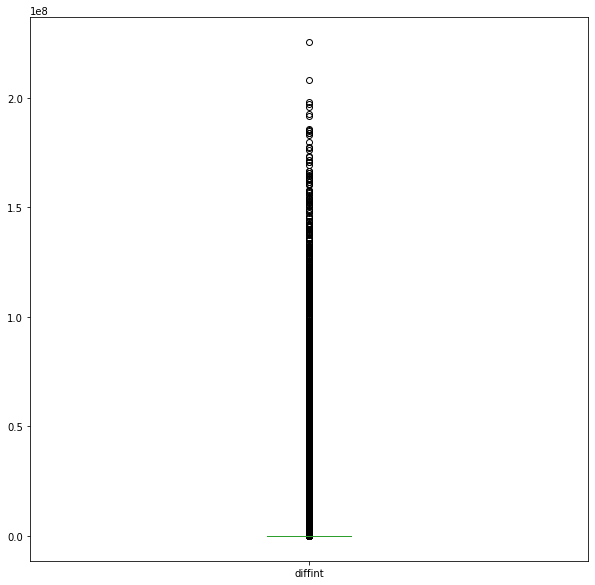

In [192]:
ff.diffint.plot.box()

**The response time is highly skewed so taking only the quartiles and filtering the dataset**

In [193]:
# Computing IQR
Q1 = ff['diffint'].quantile(0.25)
Q3 = ff['diffint'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = ff.query('(@Q1 - 1.5 * @IQR) <= diffint <= (@Q3 + 1.5 * @IQR)')

<AxesSubplot:>

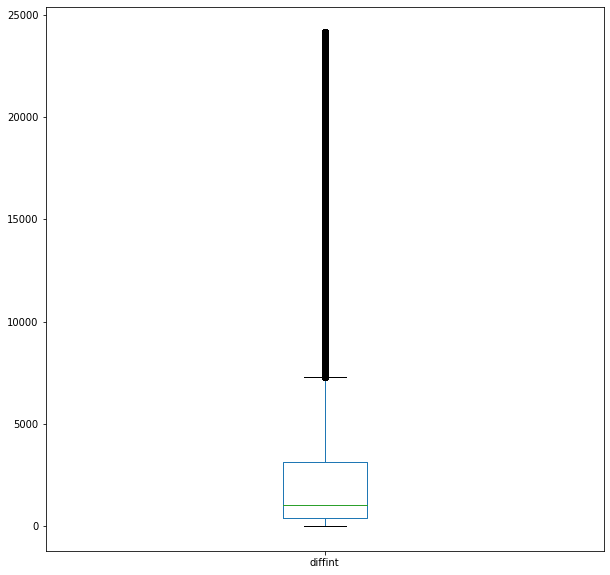

In [194]:
filtered.diffint.plot.box()

<AxesSubplot:ylabel='Tags'>

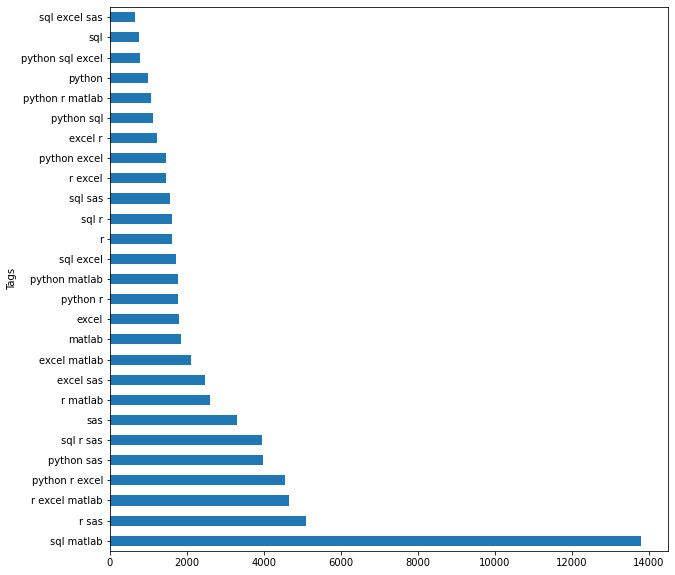

In [195]:
filtered.groupby("Tags")["diffint"].median().sort_values(ascending=False).plot.barh()

**By above graph we can infer that sql excel sas ,sql , python has combination has less response time .SQl matlab combination has taken large time to respond.so better that users can tag popular tags to getter response quickly.The response time depends on the tags attached **

***No of Tags vs Average response Time ***

<AxesSubplot:xlabel='tag_count'>

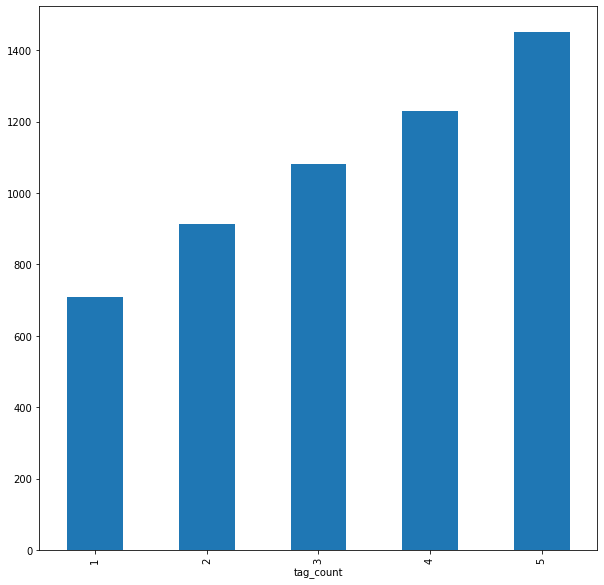

In [196]:
filtered.groupby("tag_count")["diffint"].median().plot.bar()

**From the above graph we can infer that the questions having only one tag are answered quickly as the median response time is less when it is compared with 2 or 3 or 4 **

## Inserting filtered dataframe in RDS for the EDA

In [197]:
filtered.to_sql(con=database_connection, name="ResponseTime", if_exists='replace',chunksize=100, index=False)

/home/ec2-user/.local/lib/python3.7/site-packages/pandas/io/sql.py:1422: UserWarning: The provided table name 'ResponseTime' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


In [198]:
# Creating SQL query to use together with database_connection in next line

sql_query='''
SELECT * FROM ResponseTime limit 3
'''

In [199]:
responsetime_data=pd.read_sql(sql_query,con=database_connection)

In [200]:
##fetching tha data from RDS
responsetime_data.head(3)

,q_Id,Tag,a_Id,q_CreationDate,a_CreationDate,Tags,tag_count,diffint
0,252230,sql stored-procedures subsonic,252595,2008-10-31 00:17:40,2008-10-31 04:27:08,sql,3,14968
1,1990020,sql sql-server,1990040,2010-01-01 23:29:24,2010-01-01 23:36:57,sql,2,453
2,1068900,php sql mysql,1068927,2009-07-01 12:29:25,2009-07-01 12:34:48,sql,3,323
